In [4]:
%pylab
%matplotlib ipympl
%pwd
from h5py import File
from scipy.optimize import curve_fit
from PIL import Image

def rebin(a,sumScale):
    if sumScale<1: sumScale=1
    newA = zeros(len(a)//sumScale,dtype=type(a[0]))    
    for i in arange(sumScale): newA+=a[i::sumScale][:len(a)//sumScale]
    return newA

def monitorCounts(runNumber,tofBinsMicroSeconds=10, clockTimePeriod=1.0):
    '''
    Get monitor event data and plot Instantaneous countrate over the 60Hz frame and average countrate over the entire run.
    '''
    f = File("/SNS/VENUS/IPTS-31716/nexus/VENUS_%d.nxs.h5"%runNumber,'r')
    monitorData = f['entry']['monitor8']
    runTimeSeconds = array(f['entry']['duration'])[0]
    figure("VENUS Run %d TOF Intensity"%runNumber)
    h = histogram(array(monitorData['event_time_offset']),bins=arange(0,1e6/60.0,tofBinsMicroSeconds))
    tof = (h[1][:-1]+h[1][1:])/2.0
    w = tof/18990.0*3.956
    dw = gradient(w)
    #xlabel("TOF [microseconds]")
    xlabel("Neutron Wavelength [$\AA$]")
    #ylabel("Spectral Neutron Flux [n/(cm$^2\cdot s \cdot\AA$)]")
    ylabel("Area Normalized CountRate [Counts/(cm$^2\cdot s \cdot\AA$)]")
    Y = h[0]/runTimeSeconds/dw/58.0#gradient(tof/1e6)/60.0
    sigY = sqrt(h[0])/runTimeSeconds/dw/58.0#gradient(tof/1e6)/60.0
    errorbar(w,Y,yerr=sigY,fmt='none', capsize=3)
    #axis([None,None,5e4,7e4])
    show()
    figure("VENUS Run %d Intensity over Time"%runNumber)
    time = (array(monitorData['event_time_zero'])[:-1]+array(monitorData['event_time_zero'])[1:])/2.0
    time = rebin(time,int(clockTimePeriod*60))/(clockTimePeriod*60)
    Y = rebin(diff(array(monitorData['event_index'])),int(clockTimePeriod*60))/gradient(time)
    sigY = sqrt(rebin(diff(array(monitorData['event_index'])),int(clockTimePeriod*60)))/gradient(time)
    errorbar(time,Y,yerr=sigY,fmt='none', capsize=3)
    ylabel("Countrate")
    xlabel("Time [seconds]")
    #axis([None,None,5e4,7e4])
    show()
    
def showCamera(filename):
    t = Image.open(filename)
    newT = array(t)
    namer = filename.split('/')[-1]
    figure(namer)
    clf()
    imshow(newT)
    colorbar()
    axis([None,None,0,6500])
    axis("equal")
    show()

%pwd

Using matplotlib backend: module://ipympl.backend_nbagg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


'/SNS/snfs1/instruments/VENUS/IPTS-31716/shared/MJFrostReduction/first_venus_white_beam_experiment'

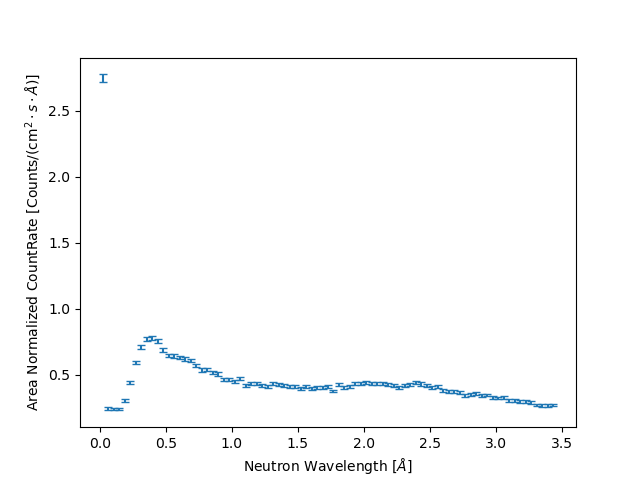

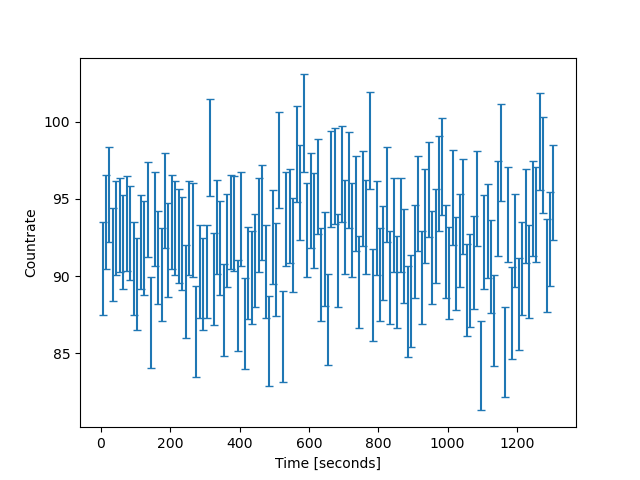

In [2]:
close("all")
monitorCounts(9,200,10.0)
figure("VENUS Run 9 TOF Intensity")
#yscale("log")
axis([None,None,0.0,1])
savefig("FirstVNUSSpectrum.svg")